# Kaggle insurance dataset regression

## Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Insurance Premium Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

# Loading libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Loading Datasets
<br>
I see that there are two datasets , `train.csv` and `test.csv`

In [26]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [27]:
training_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [28]:
testing_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


Right off the bat we see that we have null values, we can confirm this by looking into the dataset more in depth.

In [29]:
training_data.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [30]:
testing_data.isna().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

Checking for duplicated data, if there are any in the training as well as testing dataset

In [31]:
training_data.duplicated().sum()

0

In [32]:
testing_data.duplicated().sum()

0

Checking which data is what data type

In [33]:
training_data.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [34]:
testing_data.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
dtype: object

# Removing null values

There are no duplicated data, now we will start filling na values in the dataset, I will try to fillna values of numerical/continuous data with the mean, and categorical data with string 'unknown'

In [35]:
training_data.fillna(training_data.mean(numeric_only=True), inplace=True)
testing_data.fillna(testing_data.mean(numeric_only=True), inplace=True)

In [36]:
training_data.fillna({col: 'unknown' for col in training_data.select_dtypes(include='object').columns}, inplace=True)
testing_data.fillna({col: 'unknown' for col in testing_data.select_dtypes(include='object').columns}, inplace=True)

## Checking if the null values are removed

In [37]:
training_data.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [38]:
testing_data.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

After we have removed the null values and filled it up with mean and a new categorical value unknown, I see that the policy start date is in epoch format, let me change it to a proper human readable format.

In [39]:
training_data['Policy Start Date'] = pd.to_datetime(training_data['Policy Start Date'])
testing_data['Policy Start Date'] = pd.to_datetime(testing_data['Policy Start Date'])

In [40]:
# Convert datetime to epoch time
training_data['Policy Start Date'] = training_data['Policy Start Date'].astype(np.int64) / 10**9
testing_data['Policy Start Date'] = testing_data['Policy Start Date'].astype(np.int64) / 10**9

In [41]:
training_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.00000,5.0,1.703345e+09,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,unknown,15.569731,Rural,...,1.0,12.0,694.00000,2.0,1.686583e+09,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,592.92435,3.0,1.696087e+09,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,unknown,10.938144,Rural,...,1.0,0.0,367.00000,1.0,1.718206e+09,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.00000,4.0,1.638372e+09,Poor,Yes,Weekly,House,2022.0


In [42]:
testing_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,unknown,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.004873,19.0,592.904749,1.0,1.685892e+09,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.004873,14.0,372.000000,8.0,1.713799e+09,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.004873,16.0,819.000000,9.0,1.680708e+09,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.000000,3.0,770.000000,5.0,1.698247e+09,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.004873,14.0,755.000000,7.0,1.637940e+09,Average,No,Weekly,House


# Encoding categorical variables
Since for regression we need numerical columns only hence I need to encode the categorical data to numerical. I have used `LabelEncoder()` to encode all object datatypes for training and testing datasets.

In [44]:
le = LabelEncoder()
object_columns = training_data.select_dtypes(include=['object']).columns
for column_name in object_columns:
    training_data[column_name] = le.fit_transform(training_data[column_name])    
    testing_data[column_name] = le.transform(testing_data[column_name])

In [46]:
training_data.dtypes

id                        int64
Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level           int64
Occupation                int64
Health Score            float64
Location                  int64
Policy Type               int64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback         int64
Smoking Status            int64
Exercise Frequency        int64
Property Type             int64
Premium Amount          float64
dtype: object

In [47]:
# Extract the Target Column
target_column = (set(training_data.columns) - set(testing_data.columns)).pop()

print(f"Target column: {target_column}")
print(f"Data type: {training_data[target_column].dtype}")

Target column: Premium Amount
Data type: float64


# Scaling/Normalizing the data before regression

In [48]:
# Select numerical columns
numerical_columns = training_data.select_dtypes(include=['float64']).columns
numerical_columns = numerical_columns[numerical_columns != target_column]

# Applying Normalization
scaler = StandardScaler()
training_data[numerical_columns] = scaler.fit_transform(training_data[numerical_columns])
testing_data[numerical_columns] = scaler.transform(testing_data[numerical_columns])

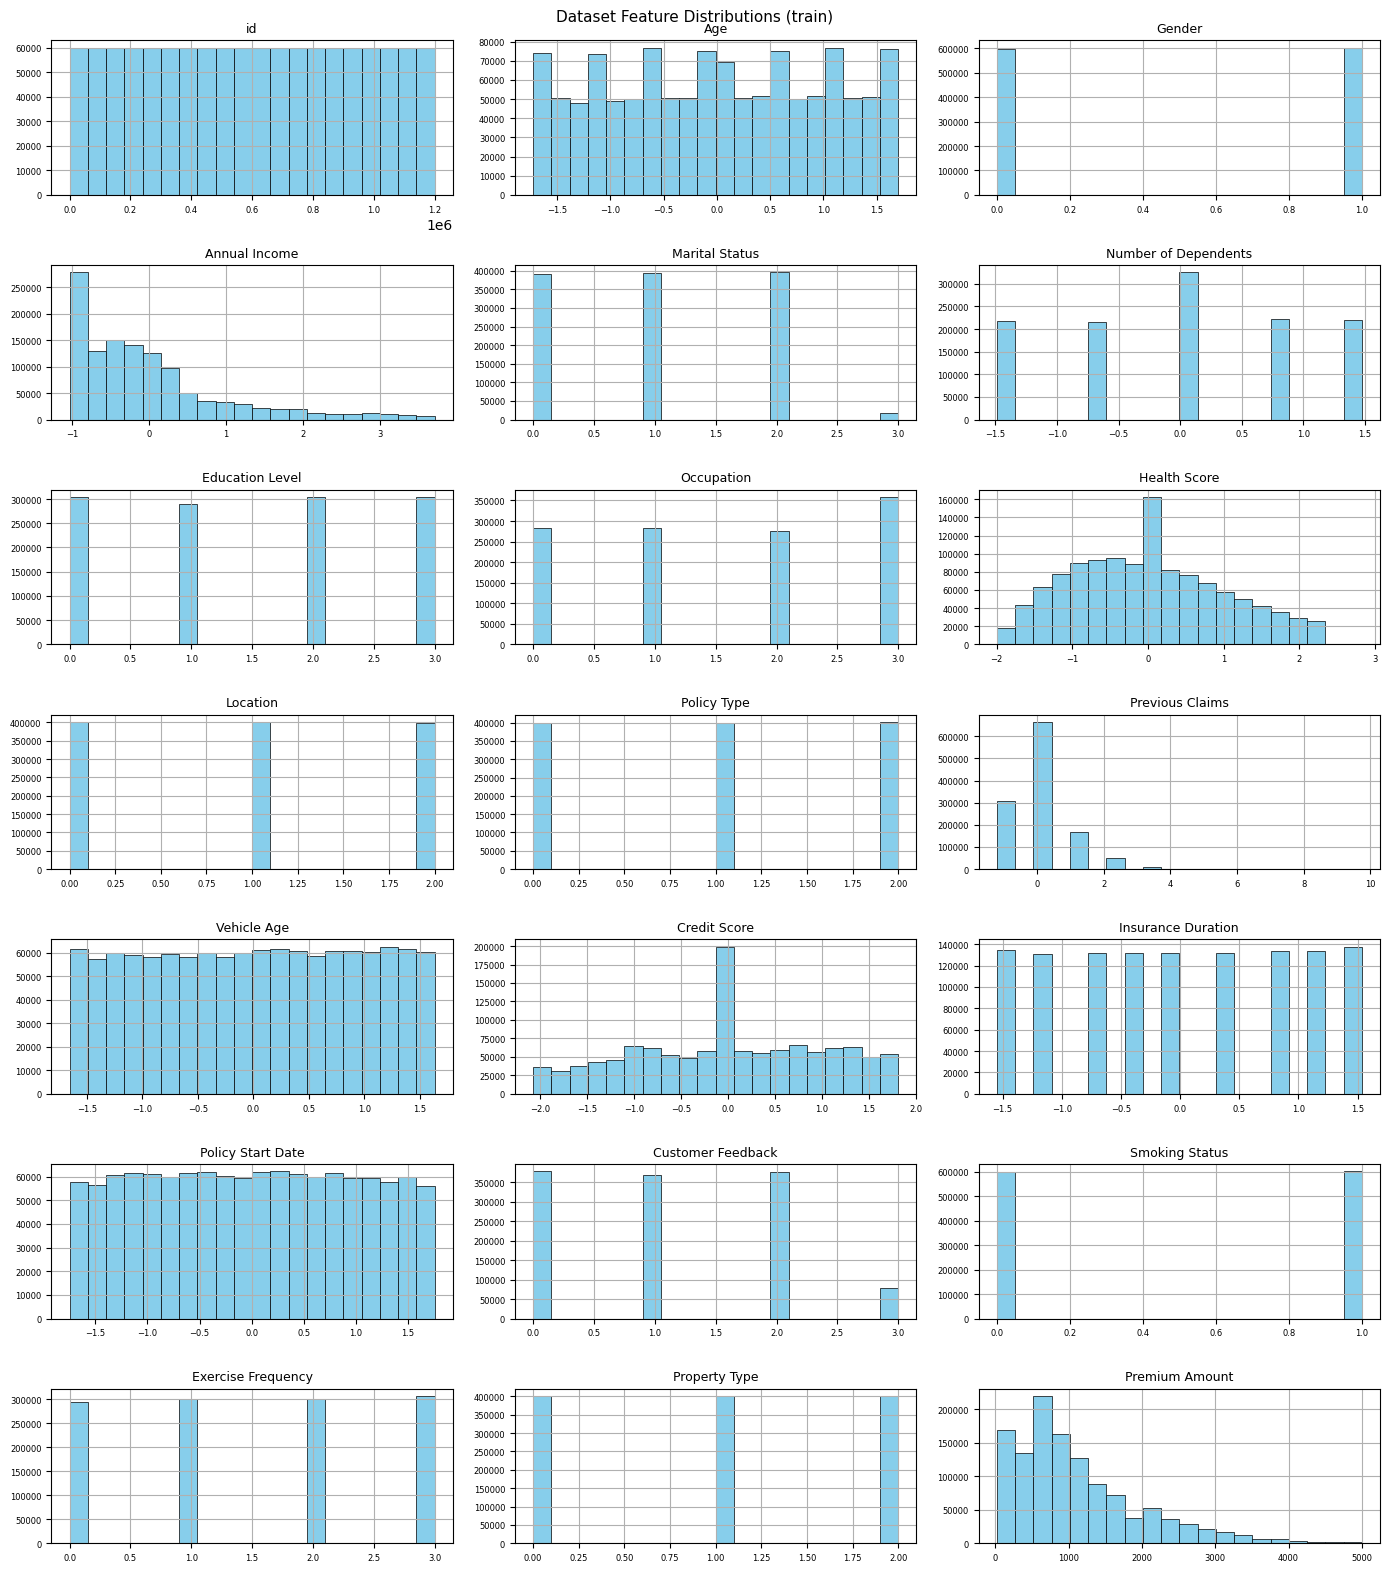

In [53]:
# Dataset Feature Distributions (train)
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(14, 16))
columns_to_plot = training_data.columns
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    training_data[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Dataset Feature Distributions (train)', fontsize=11)
plt.tight_layout()
plt.show()